# Muhammad Abdul Rozak
#221351090
# ML2

# Business Understanding

## Project Domain

**Prediksi Remote Work Productivity & Human Resource Analytics**

Sistem prediksi tipe pekerjaan (Employment Type Prediction System) merupakan bagian dari analitik sumber daya manusia (HR Analytics) yang bertujuan mendukung keputusan strategis perusahaan dalam menerapkan sistem kerja yang optimal—baik remote maupun in-office. Sistem ini memanfaatkan pendekatan machine learning dan data science untuk memprediksi tipe pekerjaan paling cocok untuk seorang karyawan berdasarkan beberapa faktor kunci, seperti:

Jam kerja per minggu

Skor kesejahteraan (Well-Being Score)

Skor produktivitas (Productivity Score)

Jenis kelamin (Gender) (opsional)

Dengan menganalisis data ini, sistem membantu:

HR dan manajer untuk memahami pola produktivitas yang optimal berdasarkan kesejahteraan dan beban kerja.

Karyawan untuk mendapatkan rekomendasi lingkungan kerja yang meningkatkan performa dan kepuasan kerja.

Organisasi dalam merancang kebijakan kerja hibrida atau jarak jauh yang lebih efektif dan berbasis data.

Sistem ini bekerja dengan cara:

Melakukan pra-pemrosesan data numerik dan kategorikal

Menggunakan model klasifikasi (misalnya TensorFlow Lite) untuk memprediksi apakah seseorang cocok bekerja secara Remote atau In-Office

Memberikan interpretasi hasil prediksi dalam bentuk label yang mudah dipahami

## Problem Statements

1. Penurunan Produktivitas Karyawan
Perusahaan menghadapi tantangan dalam mempertahankan dan meningkatkan produktivitas karyawan, terutama dalam lingkungan kerja jarak jauh (remote work) yang semakin umum pasca-pandemi.

2. Kurangnya Pemahaman terhadap Faktor yang Mempengaruhi Kinerja
Manajer dan tim HR seringkali kesulitan mengidentifikasi faktor-faktor seperti kesejahteraan mental (well-being) dan beban kerja mingguan yang memengaruhi performa karyawan.

3. Ketidakcocokan Pola Kerja dengan Preferensi Individu
Banyak karyawan mungkin lebih produktif dalam model kerja tertentu (remote atau in-office), namun tidak mendapat penyesuaian yang sesuai karena tidak adanya sistem berbasis data untuk mendukung keputusan tersebut.

4. Keterbatasan Analitik Berbasis Data dalam HR Tradisional
Sistem HR konvensional jarang mengintegrasikan data analitik untuk menilai atau memprediksi kecocokan model kerja terhadap performa individu, sehingga keputusan bersifat subjektif dan tidak optimal.

## Goals

In [4]:
# Memprediksi tipe pekerjaan karyawan (Remote atau In-Office) berdasarkan berbagai parameter yang memengaruhi produktivitas kerja, seperti:
# Jam kerja per minggu (Hours_Worked_Per_Week)
# Skor kesejahteraan atau kondisi mental (Well_Being_Score)
# Skor produktivitas (Productivity_Score)
# Jenis kelamin (Gender) (opsional)

# Membantu manajer SDM dan perusahaan untuk:
 # Mengidentifikasi lingkungan kerja yang paling sesuai bagi tiap individu guna meningkatkan performa dan kesejahteraan.
 # Menerapkan kebijakan kerja hibrida atau jarak jauh secara lebih terarah dan berbasis data.
# Mengantisipasi penurunan produktivitas dengan mengintervensi lebih dini berdasarkan prediksi sistem.

# Memberikan rekomendasi atau insight berbasis data kepada organisasi dan individu untuk:
# Menyesuaikan strategi kerja personal
# Meningkatkan keseimbangan antara produktivitas dan kesehatan mental
# Mengurangi burnout dan ketidakpuasan kerja melalui pengaturan kerja yang lebih adaptif

## Solution Statements

 Solution Statements
🔷 Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk melakukan klasifikasi tipe pekerjaan (Remote atau In-Office) berdasarkan data produktivitas, kesejahteraan, dan jam kerja karyawan. Target performa model adalah mencapai akurasi >90% dalam membedakan pola kerja yang paling sesuai untuk tiap individu.

🔷 Aplikasi Web (Streamlit)
Menyediakan antarmuka pengguna yang sederhana dan interaktif, di mana pengguna (karyawan atau HR) dapat menginput data seperti jam kerja per minggu, skor kesejahteraan, dan skor produktivitas, lalu mendapatkan prediksi tipe kerja yang paling cocok secara instan.

🔷 Optimasi dengan TensorFlow Lite
Model ANN akan dikonversi ke format TensorFlow Lite (TFLite) agar dapat dijalankan secara efisien di aplikasi mobile atau perangkat edge dengan spesifikasi rendah. Hal ini memungkinkan adopsi luas dan cepat dalam lingkungan kerja digital modern serta mendukung keputusan SDM secara real-time dan terpersonalisasi.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marz77","key":"ab4fe1b19f52acbb5eb600bc7de530ba"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d mrsimple07/remote-work-productivity

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity
License(s): apache-2.0
  0% 0.00/6.67k [00:00<?, ?B/s]
100% 6.67k/6.67k [00:00<00:00, 30.9MB/s]


In [ ]:
!mkdir remote-work-productivity
!unzip remote-work-productivity.zip -d remote-work-productivity
!ls remote-work-productivity

Archive:  remote-work-productivity.zip
  inflating: remote-work-productivity/remote_work_productivity.csv  
remote_work_productivity.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/remote-work-productivity.zip')
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


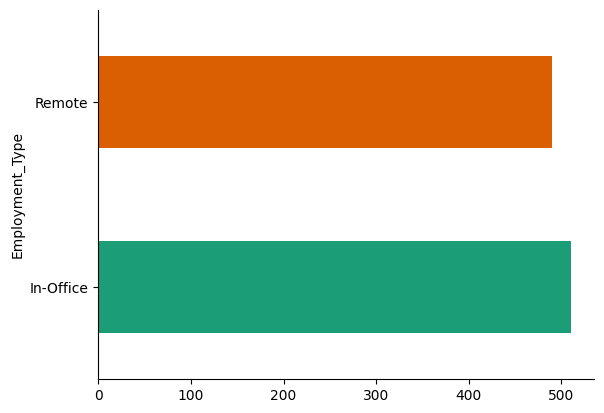

In [ ]:
# @title Employment_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Employment_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-8-1695387223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Employment_Type", data=df, palette="Set2")


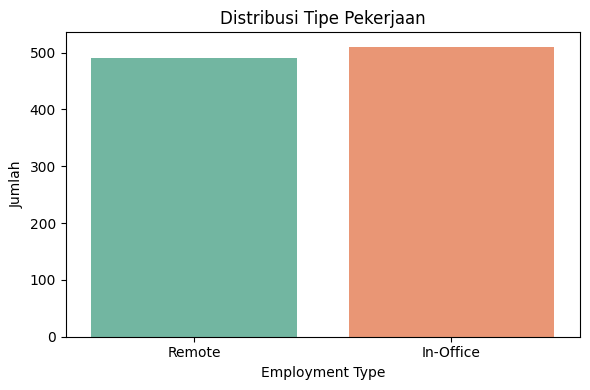

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Employment_Type", data=df, palette="Set2")
plt.title("Distribusi Tipe Pekerjaan")
plt.xlabel("Employment Type")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

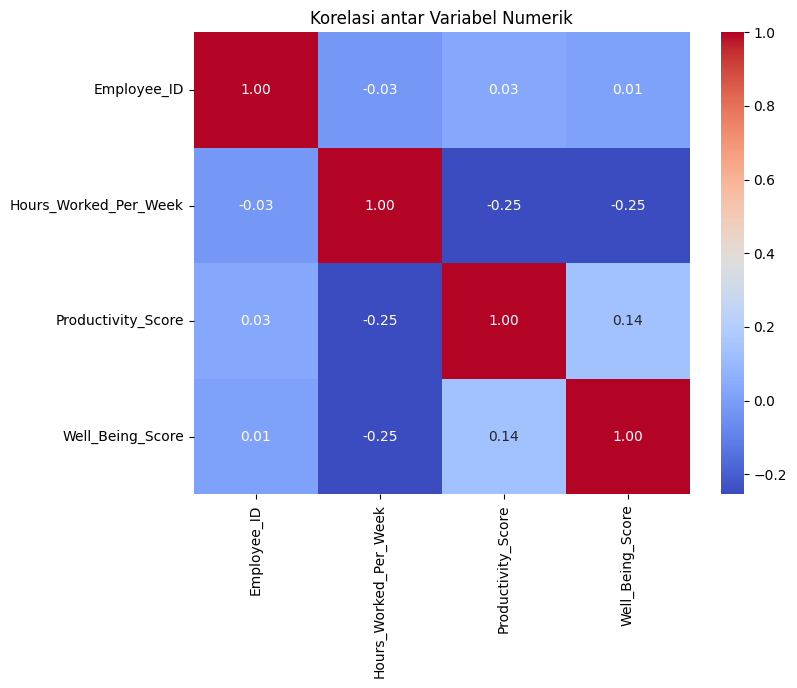

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Variabel Numerik")
plt.show()

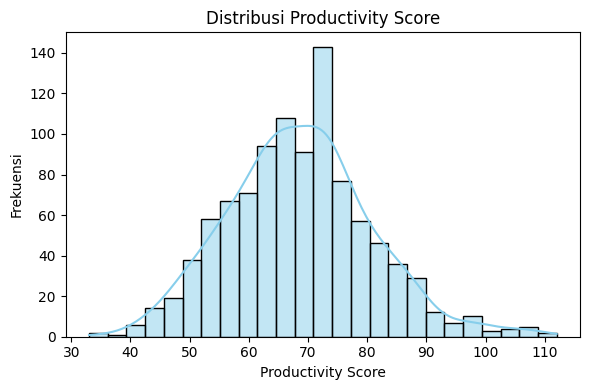

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Productivity_Score"], kde=True, color="skyblue")
plt.title("Distribusi Productivity Score")
plt.xlabel("Productivity Score")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3145795587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Employment_Type", y="Well_Being_Score", data=df, palette="Set3")


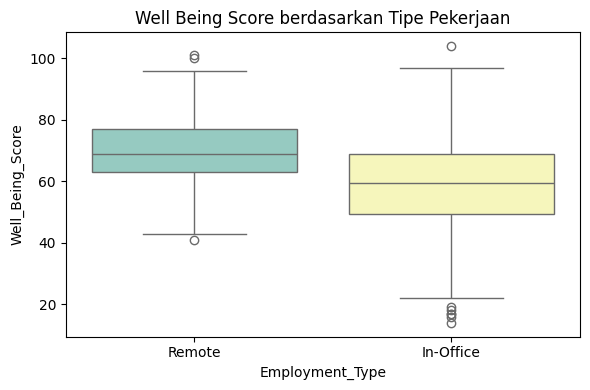

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Employment_Type", y="Well_Being_Score", data=df, palette="Set3")
plt.title("Well Being Score berdasarkan Tipe Pekerjaan")
plt.tight_layout()
plt.show()

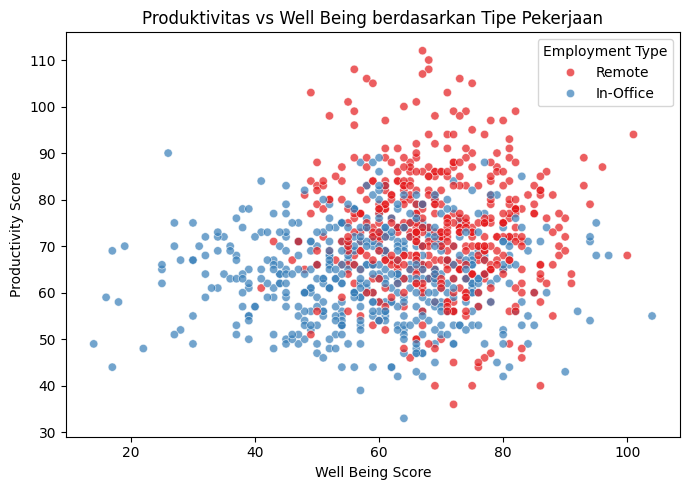

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="Well_Being_Score",
    y="Productivity_Score",
    hue="Employment_Type",
    data=df,
    palette="Set1",
    alpha=0.7
)
plt.title("Produktivitas vs Well Being berdasarkan Tipe Pekerjaan")
plt.xlabel("Well Being Score")
plt.ylabel("Productivity Score")
plt.legend(title="Employment Type")
plt.tight_layout()
plt.show()

Data Preparation

In [ ]:
df_encode = pd.DataFrame(df)

In [ ]:
df.drop(columns=['Employee_ID'], inplace=True)

In [ ]:
df.head()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,Remote,29,75,78
1,In-Office,45,49,47
2,Remote,34,74,89
3,Remote,25,81,84
4,Remote,50,70,74


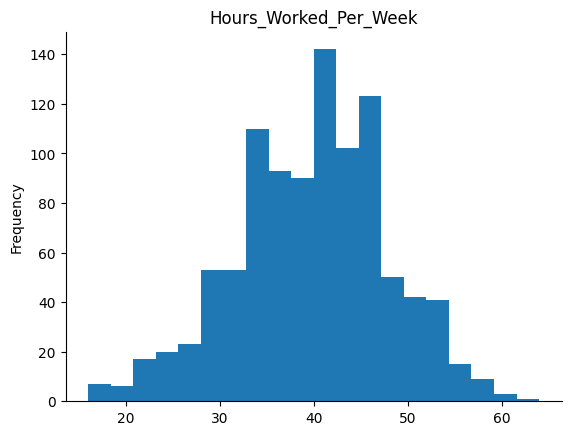

In [ ]:
# @title Hours_Worked_Per_Week

from matplotlib import pyplot as plt
df['Hours_Worked_Per_Week'].plot(kind='hist', bins=20, title='Hours_Worked_Per_Week')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Pisahkan fitur dan target
X = df_encode.drop(columns=['Employment_Type'])
y = df_encode['Employment_Type']

In [ ]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842 (3.29 KB)

 Trainable params: 842 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

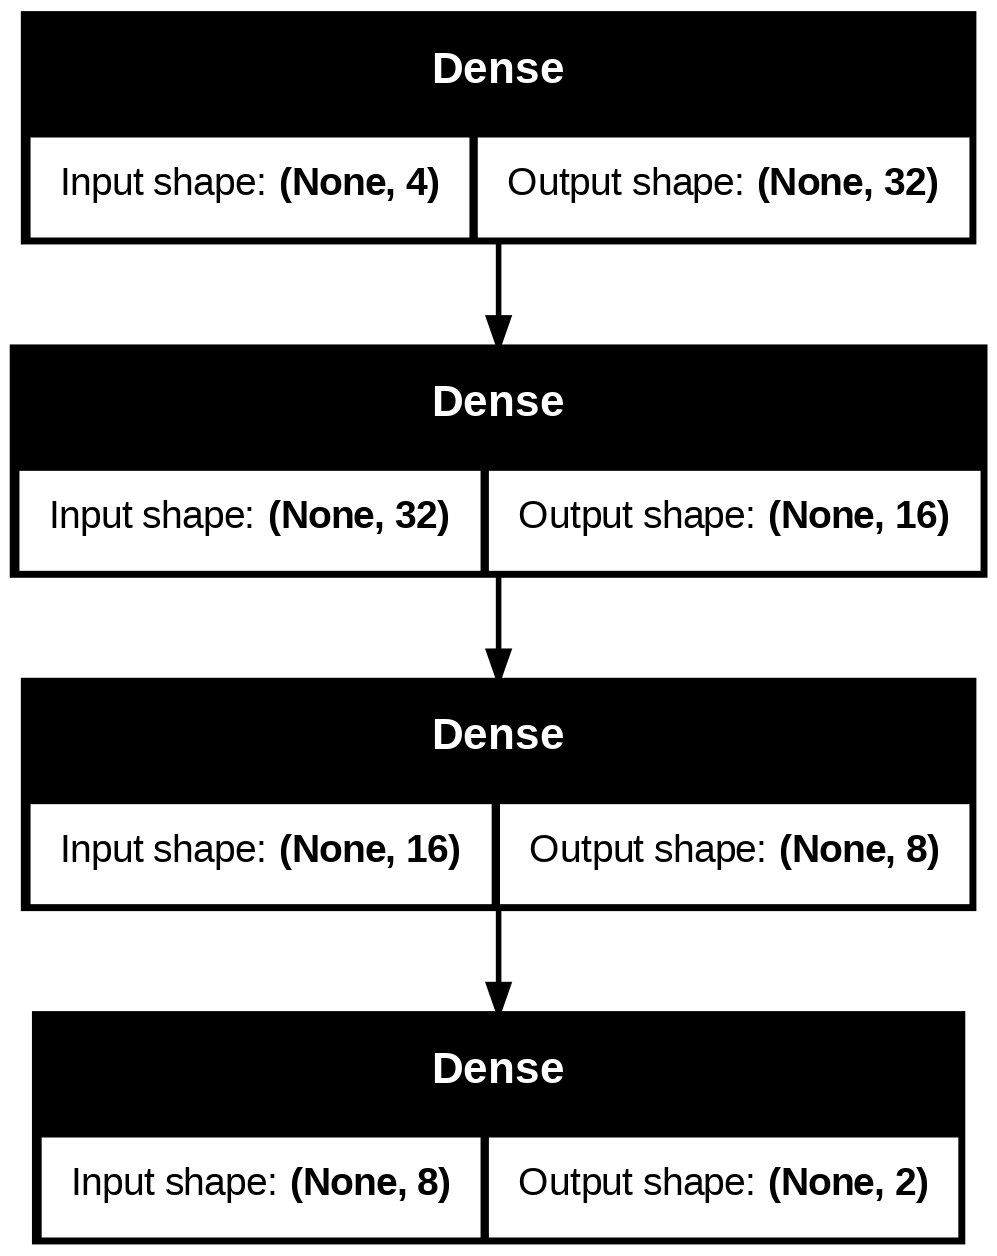

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5193 - loss: 0.6934 - val_accuracy: 0.7850 - val_loss: 0.6792
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7649 - loss: 0.6707 - val_accuracy: 0.7050 - val_loss: 0.6402
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7549 - loss: 0.6158 - val_accuracy: 0.8450 - val_loss: 0.5390
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7874 - loss: 0.5218 - val_accuracy: 0.8500 - val_loss: 0.4491
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 0.4398 - val_accuracy: 0.8350 - val_loss: 0.4128
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.3762 - val_accuracy: 0.8300 - val_loss: 0.4005
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8377 - loss: 0.3778 - val_accuracy: 0.8350 - val_loss: 0.3990
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.3734 - val_accuracy: 0.8400 - val_loss:

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.3599 
Akurasi Model: 0.8400
Loss Model: 0.3996


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

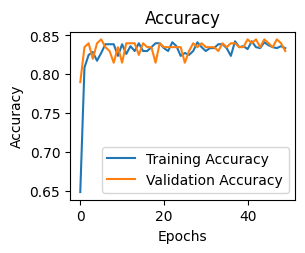

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

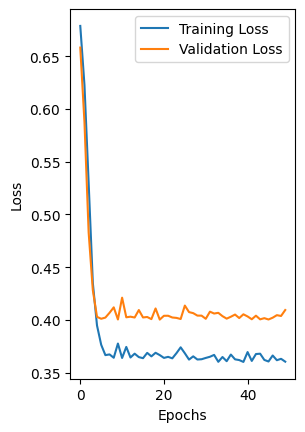

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


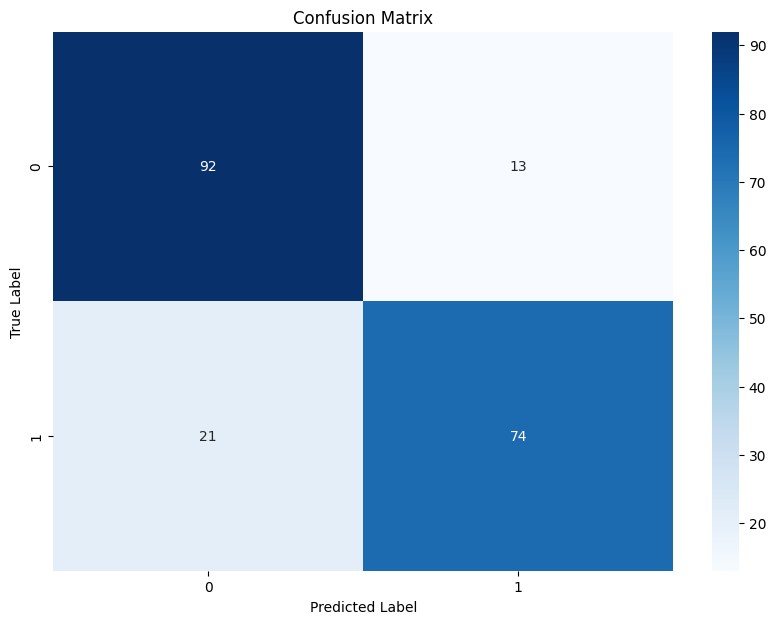

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.85      0.78      0.81        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
df.head()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,Remote,29,75,78
1,In-Office,45,49,47
2,Remote,34,74,89
3,Remote,25,81,84
4,Remote,50,70,74


In [ ]:
sample_input = np.array([[45, 50, 80, 0]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_label = le.inverse_transform([predicted_class])

print(f"Kategori produktivitas yang diprediksi: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Kategori produktivitas yang diprediksi: In-Office


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('remote-work-productivity.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp0344vbl3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140169183390480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183394896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183391440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183393168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183394512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183393744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183395664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183388176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']